In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import SVMIRandomBoxes
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

In [2]:
# Generate moons dataset
X, y = make_moons(n_samples=100, noise=0.05, random_state=42)

In [39]:
def random_box_example(X, y):
    d = X.shape[1]
    n = X.shape[0]
    created_region = False
    positive_class_idx = np.where(y == 1)[0]

    while not created_region:
        center_idx = np.random.choice(positive_class_idx)
        center_point = X[center_idx]
        points_in_region = np.zeros(n)
        radius_factor = np.random.uniform(0.15, 0.25)
        
        ranges = []

        for i in range(d):
            min_dim = np.min(X[:, i])
            max_dim = np.max(X[:, i])
            range_dim = max_dim - min_dim

            radius = range_dim * radius_factor
            min_range = center_point[i] - radius
            max_range = center_point[i] + radius
            
            ranges.append(max_range - min_range)

            idx_in_range = np.where((X[:, i] >= min_range) & (X[:, i] <= max_range))
            points_in_region[idx_in_range] += 1

        points_in_region = points_in_region / d
        points_in_region = points_in_region.astype(int)
        points_in_region = np.logical_and(points_in_region, y).astype(float)

        created_region = len(np.where(points_in_region > 0)[0]) > 1

    return points_in_region, center_point, np.array(ranges)

In [40]:
points_in_region, center_point, ranges = random_box_example(X, y)

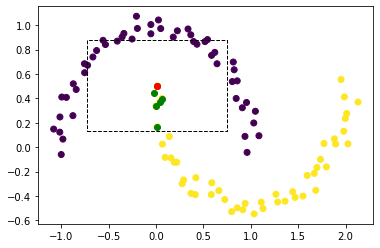

In [42]:
idx_in_box = np.where(points_in_region == 1.0)[0]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X[idx_in_box, 0], X[idx_in_box, 1], c='green')
plt.scatter(center_point[0], center_point[1], c='red')

ax = plt.gca()
rectangle = patches.Rectangle(center_point - ranges / 2, ranges[0], ranges[1], color='k', linestyle='--', fill=False)
ax.add_patch(rectangle)

plt.show()